# Clustering of Documents with LLM Embeddings

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/LLM_Embedding.ipynb)

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [1]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=3fa7b300327d434b5c3500961e5694e0aed098bb9c63639e610775abf28f5964
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers


In [2]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

embedder = SentenceTransformer('all-MiniLM-L6-v2')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/file.txt'
data = pd.read_csv(file_path)
data.head()

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [9]:
# First, let's assess the structure and size of the dataset in more detail
data.info()

# Also, let's see if the dataset contains any missing values
missing_values = data.isnull().sum()
missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5485 entries, 0 to 5484
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   5485    5485 non-null   object
dtypes: object(1)
memory usage: 43.0+ KB


5485    0
dtype: int64

In [10]:
# Extracting the numeric identifiers and the main text
data['ID'], data['Text'] = data['5485'].str.split(' ', 1).str

# Drop the original combined column
data.drop(columns=['5485'], inplace=True)

# Display the first few rows to verify the separation
data.head()


<ipython-input-10-26435cb8df27>:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['ID'], data['Text'] = data['5485'].str.split(' ', 1).str
<ipython-input-10-26435cb8df27>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  data['ID'], data['Text'] = data['5485'].str.split(' ', 1).str


,ID,Text
0,1,champion products ch approves stock split cham...
1,2,computer terminal systems cpml completes sale ...
2,1,cobanco inc cbco year net shr cts vs dlrs net ...
3,1,am international inc am nd qtr jan oper shr lo...
4,1,brown forman inc bfd th qtr net shr one dlr vs...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize the Porter stemmer for stemming
stemmer = PorterStemmer()

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and stem tokens
    tokens = [stemmer.stem(word) for word in tokens if word not in stopwords.words('english')]

    # Join the tokens back into a string
    return ' '.join(tokens)

# Apply the preprocessing function to the text column
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Display the first few rows of the processed text
data.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ID,Text,Processed_Text
0,1,champion products ch approves stock split cham...,champion product ch approv stock split champio...
1,2,computer terminal systems cpml completes sale ...,comput termin system cpml complet sale comput ...
2,1,cobanco inc cbco year net shr cts vs dlrs net ...,cobanco inc cbco year net shr ct vs dlr net vs...
3,1,am international inc am nd qtr jan oper shr lo...,intern inc nd qtr jan oper shr loss two ct vs ...
4,1,brown forman inc bfd th qtr net shr one dlr vs...,brown forman inc bfd th qtr net shr one dlr vs...


In [12]:
corpus_embeddings = embedder.encode(data['Processed_Text'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

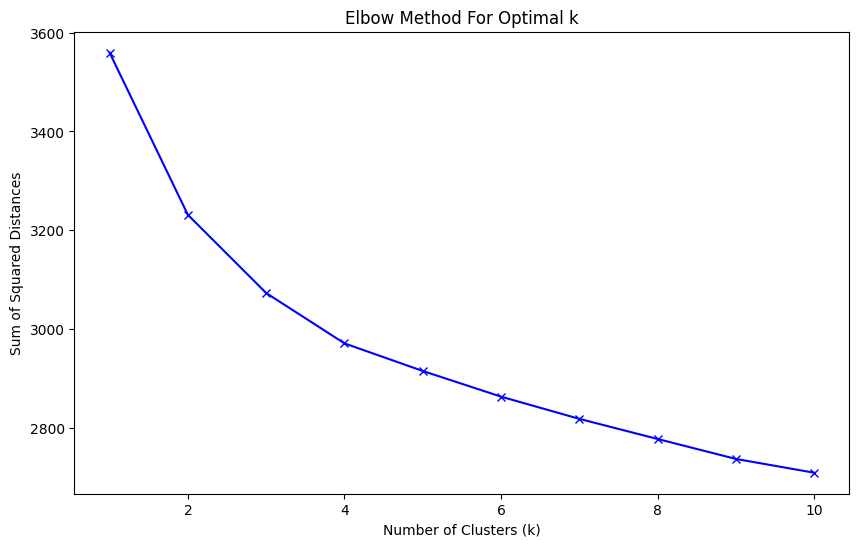

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow Method
# We'll fit multiple k-means models and plot the sum of squared distances

# Range of potential number of clusters to try
k_range = range(1, 11)

# Sum of squared distances for each k
sum_of_squared_distances = []

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(corpus_embeddings)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(k_range, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [14]:
# Perform K-means clustering
k_optimal = 4  # Replace with your optimal number of clusters
kmeans = KMeans(n_clusters=k_optimal)
kmeans = kmeans.fit(corpus_embeddings)
data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
data.head()

,ID,Text,Processed_Text,Cluster
0,1,champion products ch approves stock split cham...,champion product ch approv stock split champio...,2
1,2,computer terminal systems cpml completes sale ...,comput termin system cpml complet sale comput ...,2
2,1,cobanco inc cbco year net shr cts vs dlrs net ...,cobanco inc cbco year net shr ct vs dlr net vs...,3
3,1,am international inc am nd qtr jan oper shr lo...,intern inc nd qtr jan oper shr loss two ct vs ...,3
4,1,brown forman inc bfd th qtr net shr one dlr vs...,brown forman inc bfd th qtr net shr one dlr vs...,3


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 5485 samples in 0.002s...
[t-SNE] Computed neighbors for 5485 samples in 2.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5485
[t-SNE] Computed conditional probabilities for sample 2000 / 5485
[t-SNE] Computed conditional probabilities for sample 3000 / 5485
[t-SNE] Computed conditional probabilities for sample 4000 / 5485
[t-SNE] Computed conditional probabilities for sample 5000 / 5485
[t-SNE] Computed conditional probabilities for sample 5485 / 5485
[t-SNE] Mean sigma: 0.239517
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.709427
[t-SNE] KL divergence after 300 iterations: 2.489029


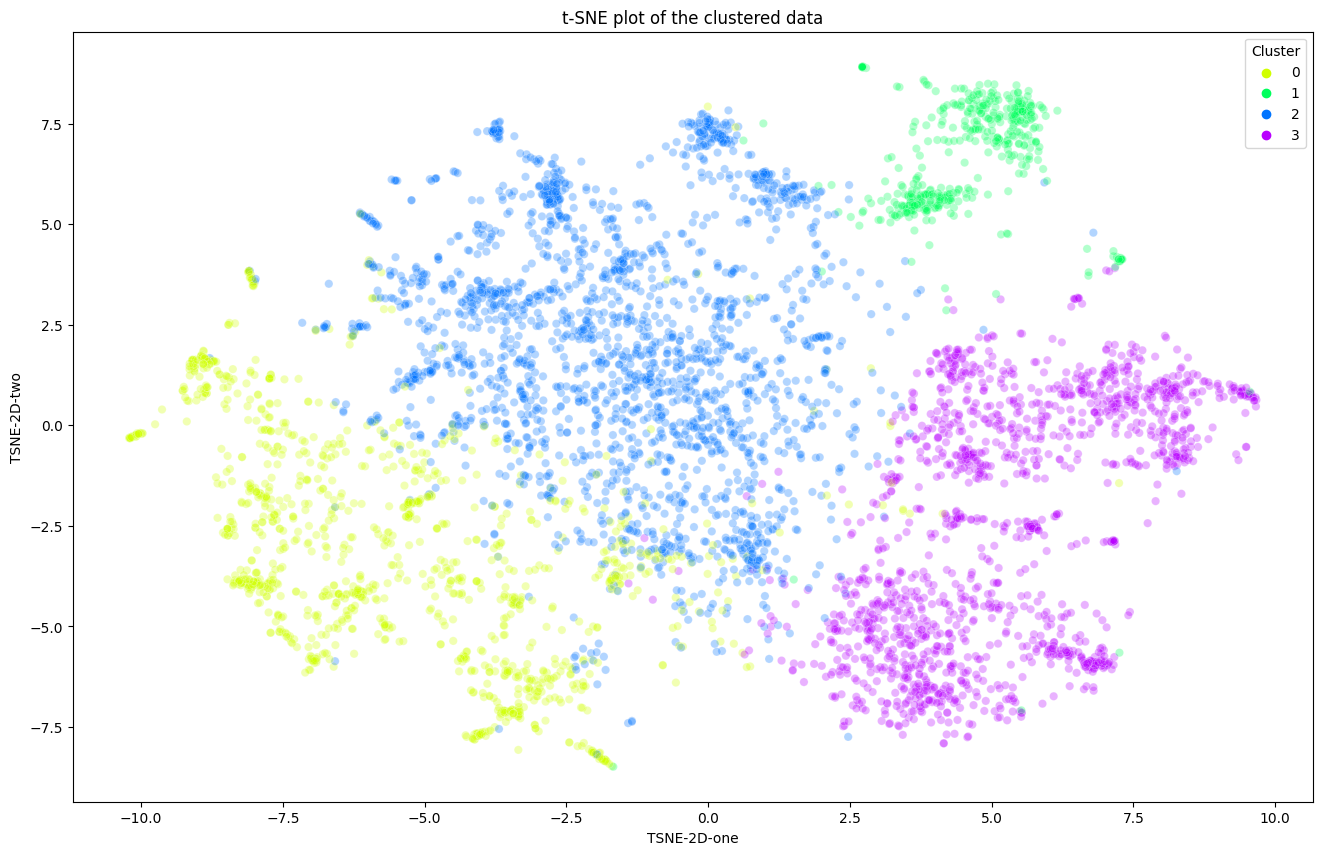

In [17]:
# Dimensionality Reduction for Visualization
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(corpus_embeddings)
data['TSNE-2D-one'] = tsne_results[:,0]
data['TSNE-2D-two'] = tsne_results[:,1]

# Plotting the clusters
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="TSNE-2D-one", y="TSNE-2D-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", k_optimal),
    data=data,
    legend="full",
    alpha=0.3
)
plt.title('t-SNE plot of the clustered data')
plt.show()